In [21]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# Data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

# Metadata
print(default_of_credit_card_clients.metadata)

# Variable information
print(default_of_credit_card_clients.variables)

{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'The comparisons of data mining techniques for the predictive accuracy of probability of default of cre

In [22]:
# Display the first few rows of the features and target
print("Features DataFrame shape:", X.shape)
X.head()

print("Target Series shape:", y.shape)
y.head()

Features DataFrame shape: (30000, 23)
Target Series shape: (30000, 1)


,Y
0,1
1,1
2,0
3,0
4,0


In [23]:
# Check for missing values in features
print("Missing values in features:\n", X.isnull().sum())

# Check the unique values in the target variable
print("Unique values in target variable:\n", y.value_counts())

Missing values in features:
 X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64
Unique values in target variable:
 Y
0    23364
1     6636
Name: count, dtype: int64


/var/folders/6f/54p90_w56n76wgvyp2rgfnl00000gn/T/ipykernel_78990/1111164033.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pay_columns, y=payment_ratios, palette='viridis')


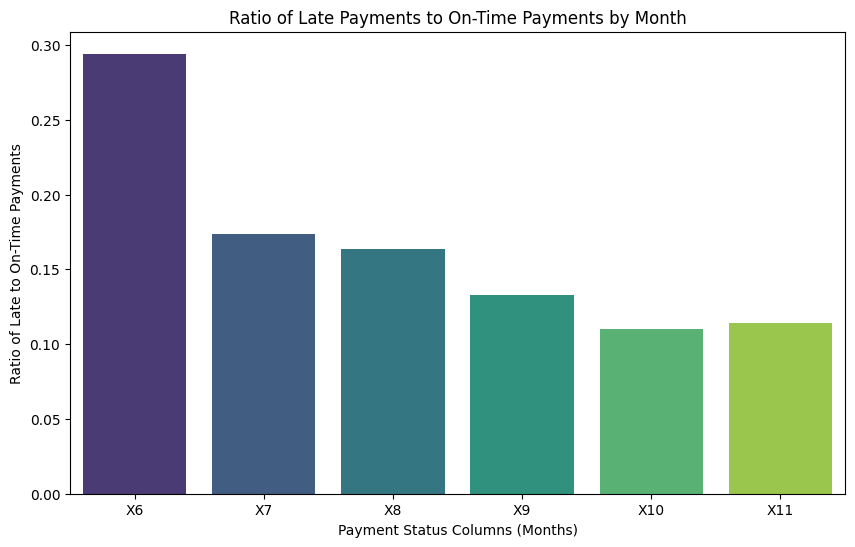

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns that represent payment status for each month
pay_columns = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']

# Create a DataFrame to hold the count of on-time and late payments
payment_status = pd.DataFrame(index=['On Time', 'Late'])

# Calculate the counts for each payment status for each month
for col in pay_columns:
    on_time_count = (X[col] <= 0).sum()  # Payments that are on time (<= 0)
    late_count = (X[col] > 0).sum()      # Payments that are late (> 0)
    payment_status[col] = [on_time_count, late_count]

# Plot the ratios of late to on-time payments for each month
payment_ratios = payment_status.loc['Late'] / payment_status.loc['On Time']

plt.figure(figsize=(10, 6))
sns.barplot(x=pay_columns, y=payment_ratios, palette='viridis')
plt.title('Ratio of Late Payments to On-Time Payments by Month')
plt.xlabel('Payment Status Columns (Months)')
plt.ylabel('Ratio of Late to On-Time Payments')
plt.show()


/var/folders/6f/54p90_w56n76wgvyp2rgfnl00000gn/T/ipykernel_78990/540919899.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_columns, y=payment_ratios, palette='viridis')


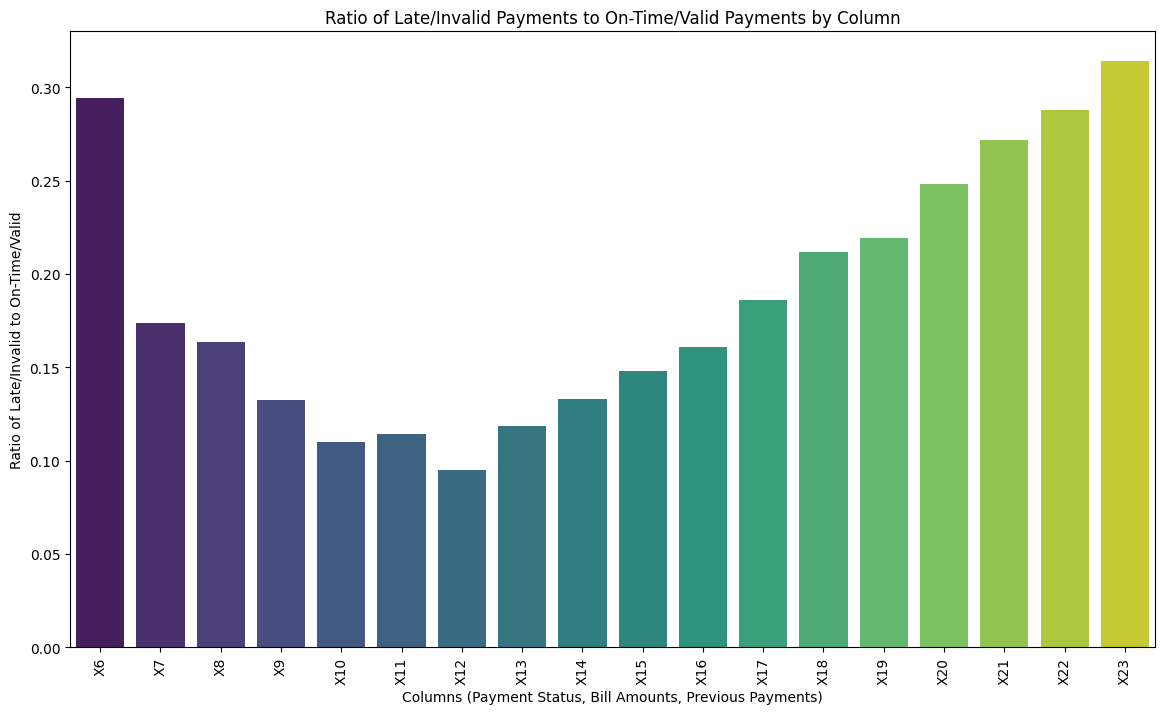

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of all columns from X6 to X23
all_columns = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 
               'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
               'X18', 'X19', 'X20', 'X21', 'X22', 'X23']

# Create a DataFrame to hold the count of on-time and late payments or valid vs invalid amounts
payment_status = pd.DataFrame(index=['On Time/Valid', 'Late/Invalid'])

# Calculate the counts for each column
for col in all_columns:
    if col in ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']:  # Payment status columns
        on_time_count = (X[col] <= 0).sum()  # Payments that are on time (<= 0)
        late_count = (X[col] > 0).sum()      # Payments that are late (> 0)
    else:  # Bill amounts and previous payment amounts
        on_time_count = (X[col] > 0).sum()  # Valid amounts (> 0)
        late_count = (X[col] <= 0).sum()    # Invalid or zero amounts (<= 0)
    
    payment_status[col] = [on_time_count, late_count]

# Plot the ratios of late/invalid to on-time/valid for each column
payment_ratios = payment_status.loc['Late/Invalid'] / payment_status.loc['On Time/Valid']

plt.figure(figsize=(14, 8))
sns.barplot(x=all_columns, y=payment_ratios, palette='viridis')
plt.title('Ratio of Late/Invalid Payments to On-Time/Valid Payments by Column')
plt.xlabel('Columns (Payment Status, Bill Amounts, Previous Payments)')
plt.ylabel('Ratio of Late/Invalid to On-Time/Valid')
plt.xticks(rotation=90)
plt.show()


Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')


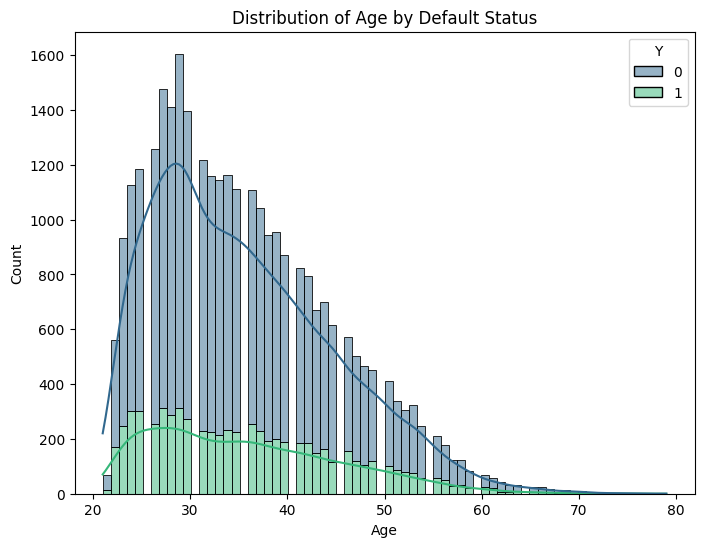

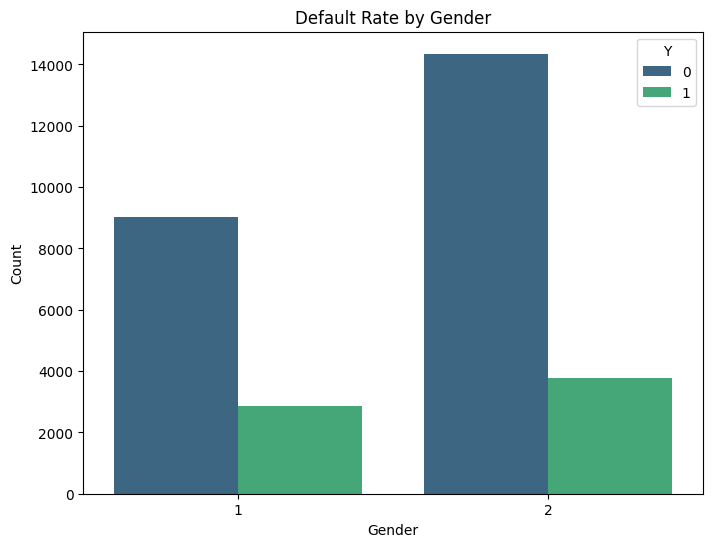

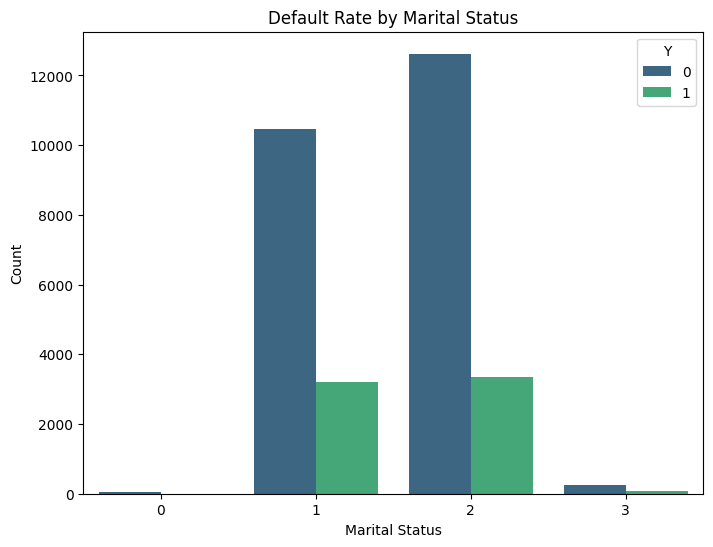

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If y is a DataFrame, convert it to a Series
if isinstance(y, pd.DataFrame):
    y_series = y.squeeze()  # Converts a DataFrame with one column to a Series
else:
    y_series = pd.Series(y.squeeze(), name='Y')  # If y is already an array, convert it to a Series

# Combine X and y into a single DataFrame for easy plotting
data = pd.concat([X, y_series], axis=1)

# Verify that 'Y' column exists in data
print(data.columns)

# Analyzing the relationship between age and default
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='X5', kde=True, hue='Y', multiple="stack", palette='viridis')
plt.title('Distribution of Age by Default Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Analyzing the relationship between gender and default
plt.figure(figsize=(8, 6))
sns.countplot(x='X2', hue='Y', data=data, palette='viridis')
plt.title('Default Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Analyzing the relationship between marital status and default
plt.figure(figsize=(8, 6))
sns.countplot(x='X4', hue='Y', data=data, palette='viridis')
plt.title('Default Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


Column names in X:
 Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23'],
      dtype='object')


/var/folders/6f/54p90_w56n76wgvyp2rgfnl00000gn/T/ipykernel_78990/467597482.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_series, palette='viridis')


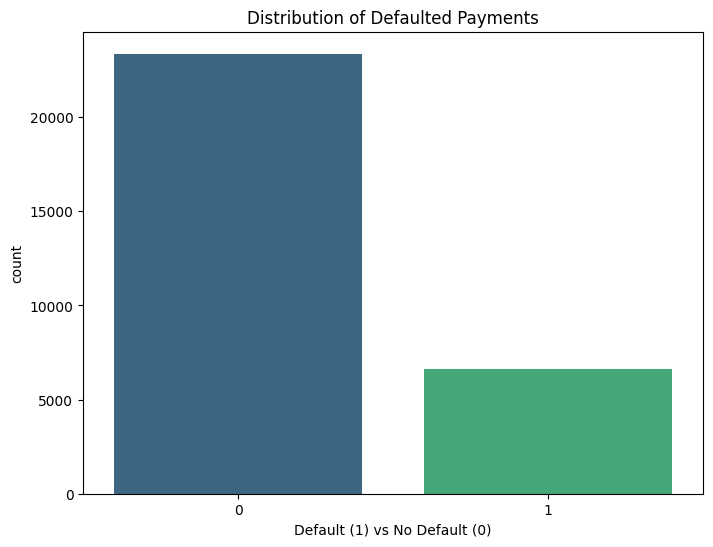

/var/folders/6f/54p90_w56n76wgvyp2rgfnl00000gn/T/ipykernel_78990/467597482.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(X['X1'], kde=True, palette='viridis')


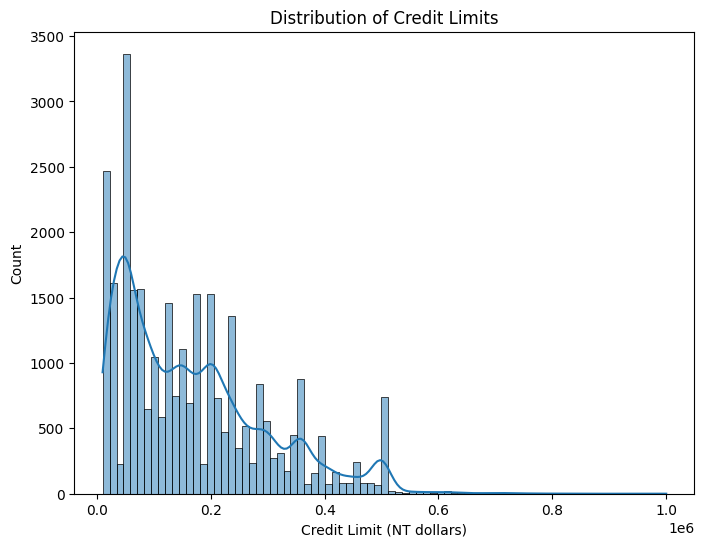

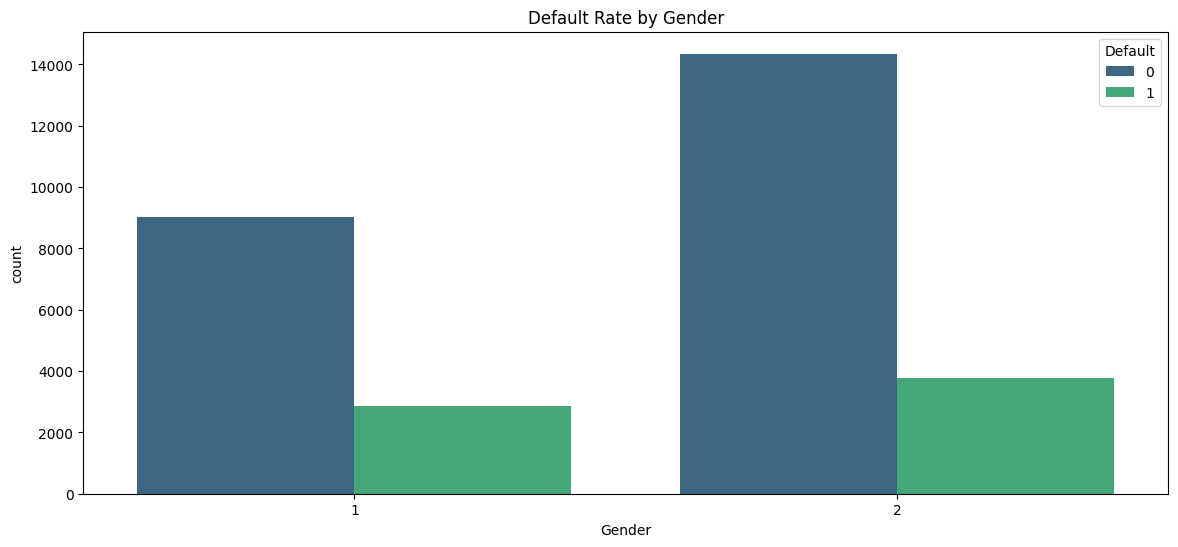

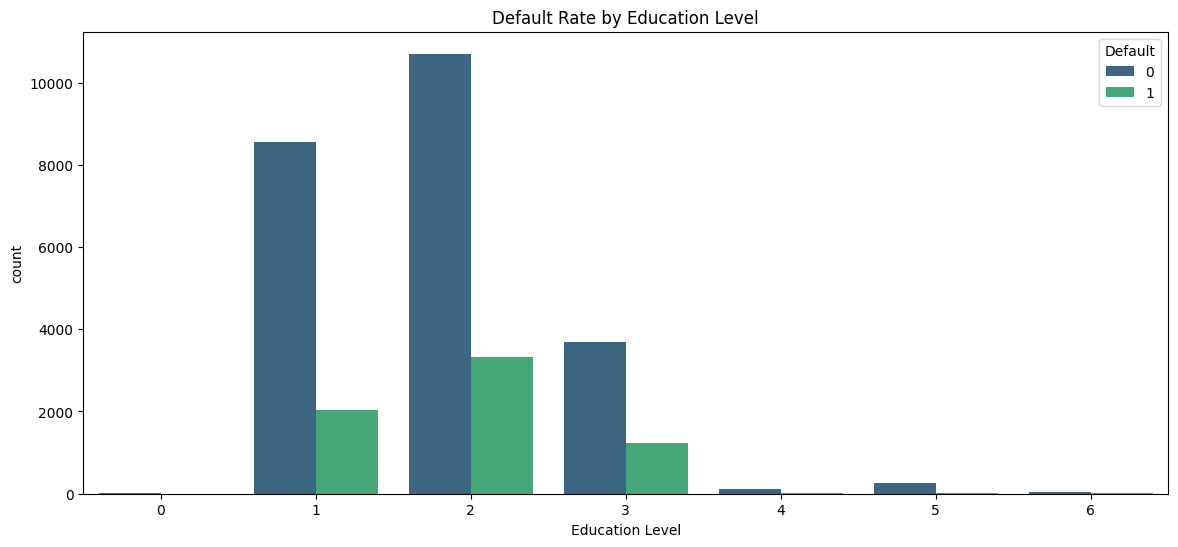

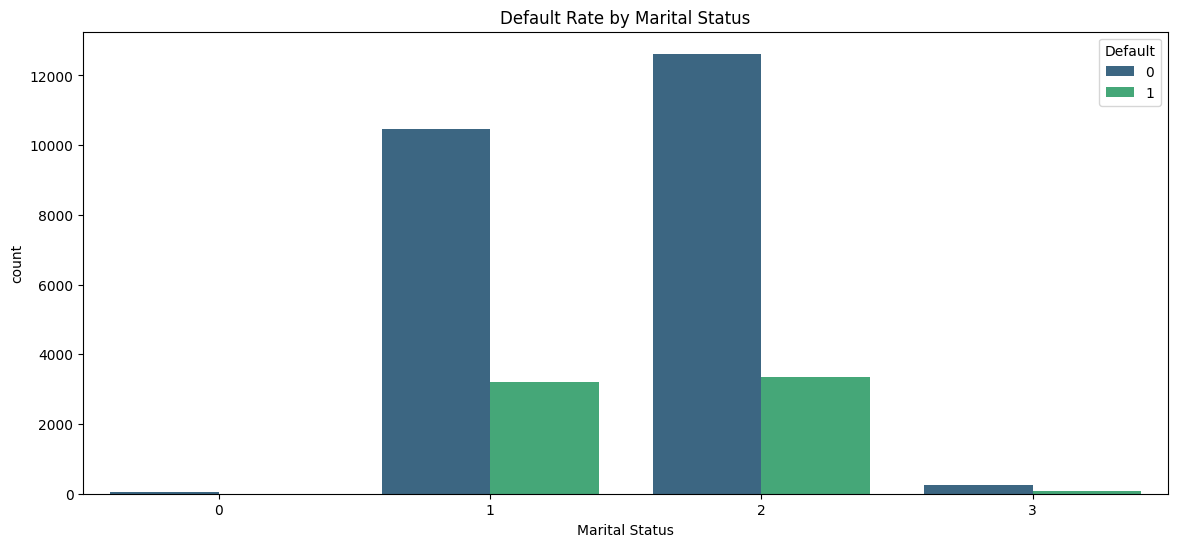

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If y is a DataFrame, convert it to a Series
y_series = y.squeeze()  # Converts DataFrame to Series if it has a single column
y_series.name = 'Default'  # Ensure the name is set for consistency

# Check the column names in X
print("Column names in X:\n", X.columns)

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y_series, palette='viridis')
plt.title('Distribution of Defaulted Payments')
plt.xlabel('Default (1) vs No Default (0)')
plt.show()

# Analyzing the distribution of credit limits 
plt.figure(figsize=(8, 6))
sns.histplot(X['X1'], kde=True, palette='viridis')
plt.title('Distribution of Credit Limits')
plt.xlabel('Credit Limit (NT dollars)')
plt.show()

# Analyzing relationships between demographic factors and default rates

# Assuming 'X2' is the column for 'SEX'
plt.figure(figsize=(14, 6))
sns.countplot(x=X['X2'], hue=y_series, palette='viridis')
plt.title('Default Rate by Gender')
plt.xlabel('Gender')
plt.show()

# Assuming 'X3' is the column for 'EDUCATION'
plt.figure(figsize=(14, 6))
sns.countplot(x=X['X3'], hue=y_series, palette='viridis')
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.show()

# Assuming 'X4' is the column for 'MARRIAGE'
plt.figure(figsize=(14, 6))
sns.countplot(x=X['X4'], hue=y_series, palette='viridis')
plt.title('Default Rate by Marital Status')
plt.xlabel('Marital Status')
plt.show()



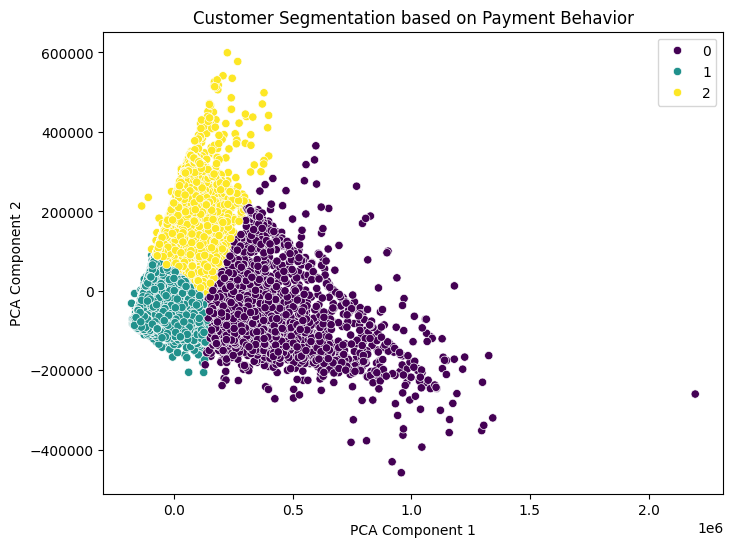

In [28]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reduce dimensionality for clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segmentation based on Payment Behavior')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.36      0.45      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

[[6616  424]
 [1260  700]]


/var/folders/6f/54p90_w56n76wgvyp2rgfnl00000gn/T/ipykernel_78990/3419598928.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')


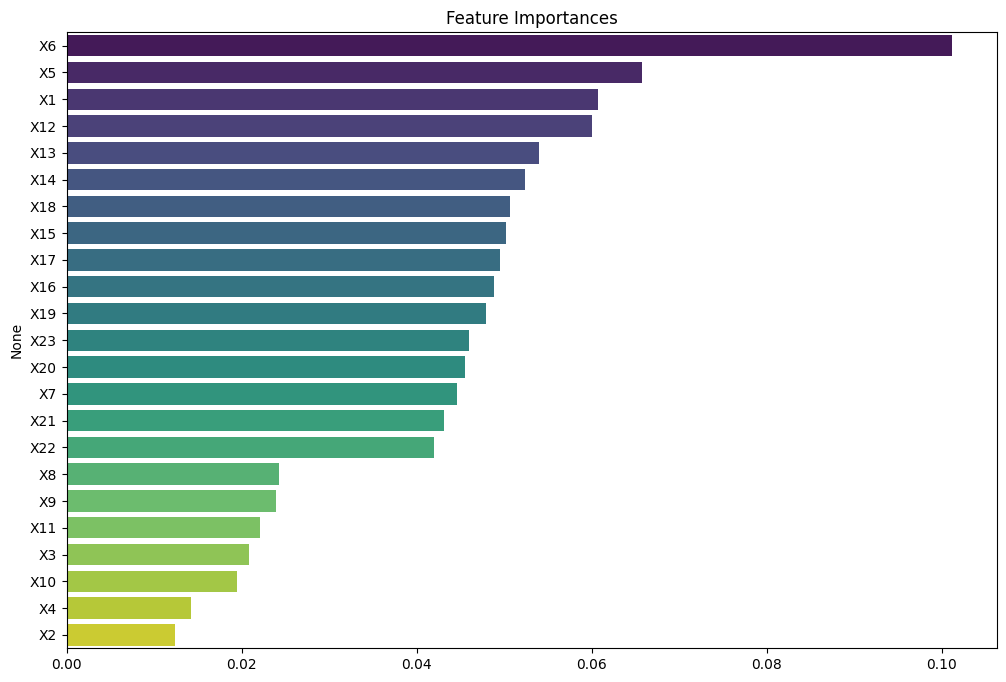

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert y to a 1D array if it's a DataFrame
y = y.squeeze().to_numpy()  # Convert to a 1D numpy array

# Prepare the data for modeling
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title('Feature Importances')
plt.show()

In [30]:
# Display the top 10 most important features
top_features = X.columns[indices][:10]
top_importances = importances[indices][:10]

for feature, importance in zip(top_features, top_importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: X6, Importance: 0.1012
Feature: X5, Importance: 0.0658
Feature: X1, Importance: 0.0608
Feature: X12, Importance: 0.0600
Feature: X13, Importance: 0.0540
Feature: X14, Importance: 0.0523
Feature: X18, Importance: 0.0507
Feature: X15, Importance: 0.0502
Feature: X17, Importance: 0.0496
Feature: X16, Importance: 0.0489


/var/folders/6f/54p90_w56n76wgvyp2rgfnl00000gn/T/ipykernel_78990/3792794996.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=feature_to_plot, palette='viridis')


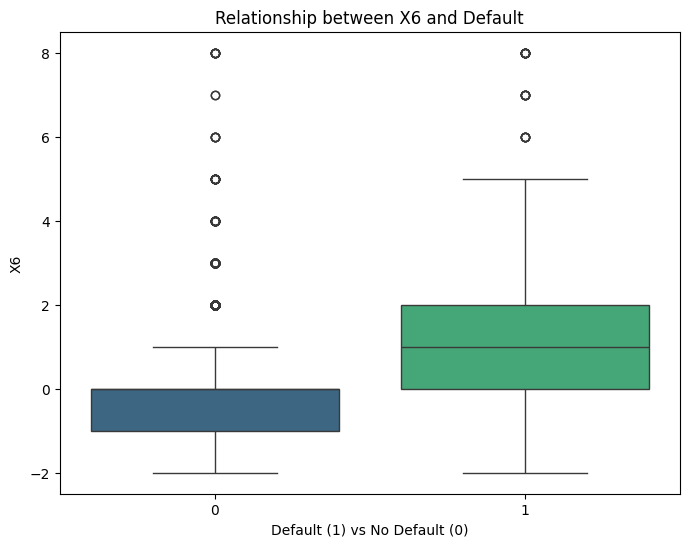

In [31]:
# Ensure that the top feature and the target variable are 1D arrays or Series
feature_to_plot = X[top_features[0]].squeeze()
y = y.squeeze()

# Visualizing the relationship between the top feature and the target variable
plt.figure(figsize=(8, 6))
sns.boxplot(x=y, y=feature_to_plot, palette='viridis')
plt.title(f'Relationship between {top_features[0]} and Default')
plt.xlabel('Default (1) vs No Default (0)')
plt.ylabel(top_features[0])
plt.show()

AUC-ROC Score: 0.6916


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


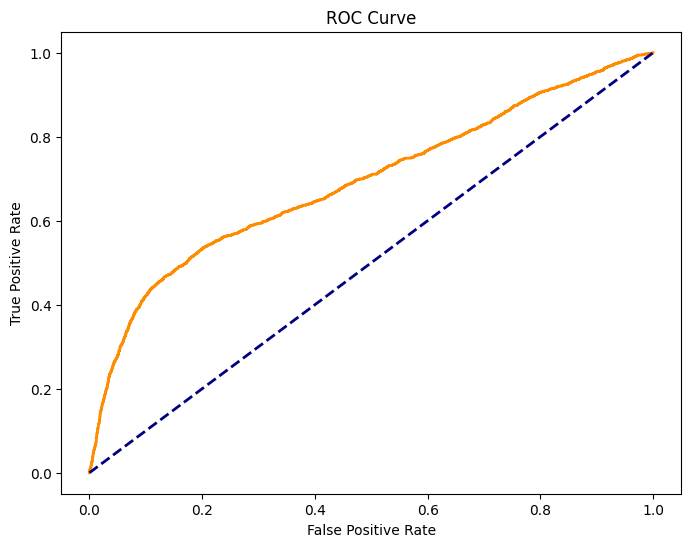

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# Train a logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = log_model.predict_proba(X_test)[:, 1]

# Evaluate the model using AUC-ROC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


/var/folders/6f/54p90_w56n76wgvyp2rgfnl00000gn/T/ipykernel_78990/4197232938.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_1d, y=credit_limit, palette='viridis')


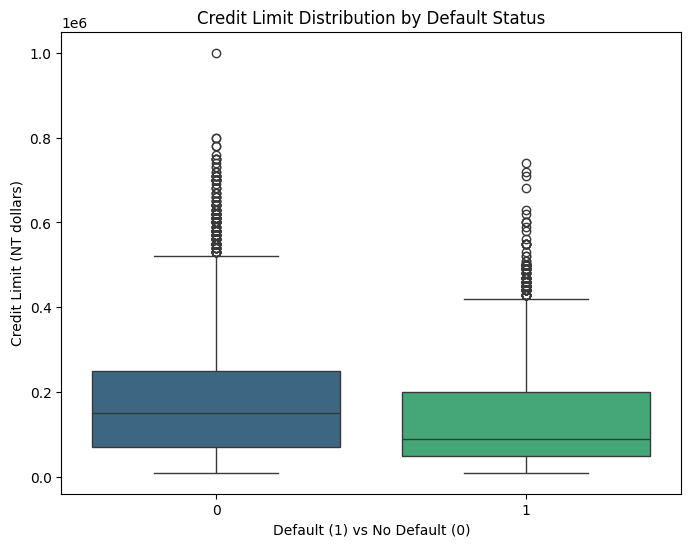

In [33]:
# Ensure that y and X['X1'] are 1D arrays or Series
y_1d = y.squeeze()  # or use y.ravel()
credit_limit = X['X1'].squeeze()  # or use X['X1'].ravel()

# Plotting credit limit distribution for defaulters vs non-defaulters
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_1d, y=credit_limit, palette='viridis')
plt.title('Credit Limit Distribution by Default Status')
plt.xlabel('Default (1) vs No Default (0)')
plt.ylabel('Credit Limit (NT dollars)')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler

# Scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use logistic regression with more iterations
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())  # Ensure y_train is 1D

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Display the top 10 most important features
top_features = X.columns[indices][:10]
top_importances = importances[indices][:10]

print("Top 10 most important features:")
for feature, importance in zip(top_features, top_importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.36      0.45      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

[[6616  424]
 [1260  700]]
Top 10 most important features:
Feature: X6, Importance: 0.1012
Feature: X5, Importance: 0.0658
Feature: X1, Importance: 0.0608
Feature: X12, Importance: 0.0600
Feature: X13, Importance: 0.0540
Feature: X14, Importance: 0.0523
Feature: X18, Importance: 0.0507
Feature: X15, Importance: 0.0502
Feature: X17, Importance: 0.0496
Feature: X16, Importance: 0.0489


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming the dataset is loaded into X (features) and y (target)

# If y is already a numpy array, you don't need to convert it
y = y.squeeze()  # This flattens y if it's a 2D array, but it's optional if y is already 1D

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


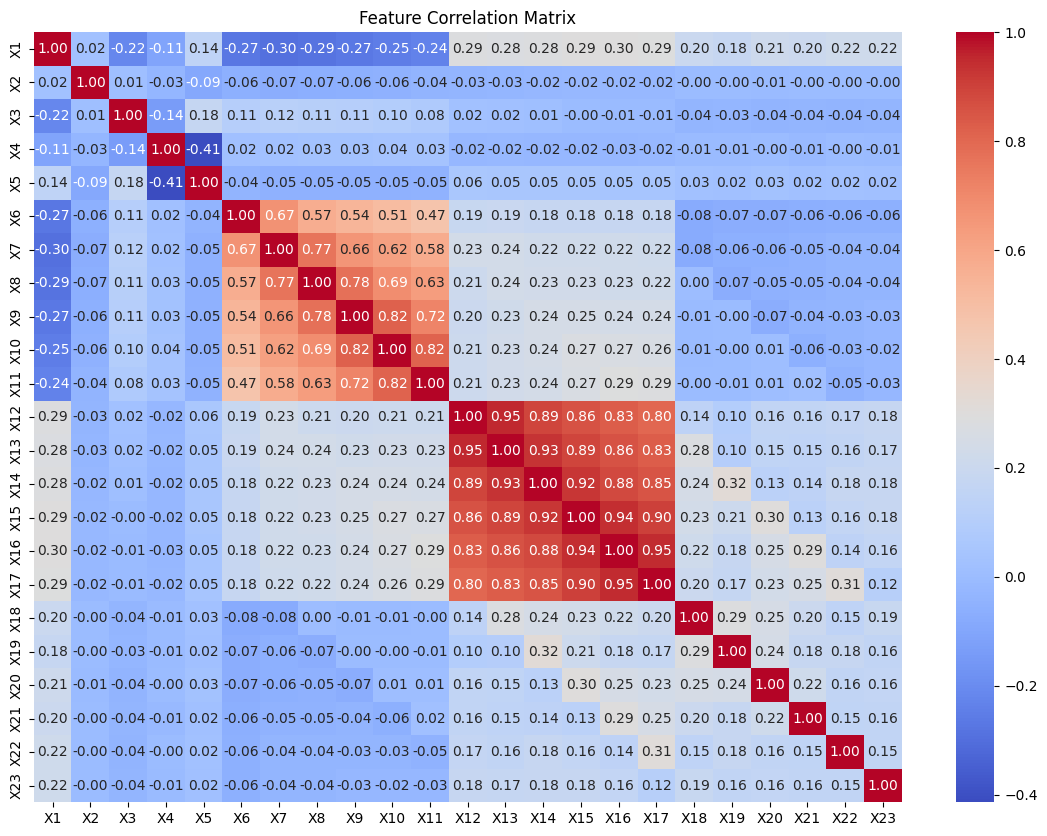

In [37]:
plt.figure(figsize=(14, 10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


NameError: name 'recall' is not defined

<Figure size 800x600 with 0 Axes>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


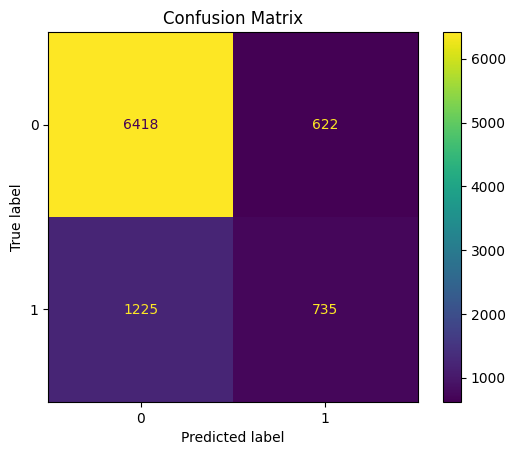

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Reduced range for n_estimators
    'max_depth': [None, 10, 20],  # Reduced options for max_depth
    'min_samples_split': [2, 5],  # Reduced options for min_samples_split
    'min_samples_leaf': [1, 2]    # Reduced options for min_samples_leaf
}

# Initialize RandomizedSearchCV with the reduced grid
random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_grid, 
                                   n_iter=10,  # Number of parameter settings sampled
                                   cv=3,       # Reduced cross-validation folds
                                   n_jobs=-1,  # Use all available processors
                                   verbose=2, 
                                   scoring='roc_auc', 
                                   random_state=42)

# Fit the RandomizedSearchCV model
random_search.fit(X_train_scaled, y_train)

# Best parameters found
print(f"Best parameters: {random_search.best_params_}")

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_best_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_best_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_depth=20, min

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Group by default status and calculate mean values for each group
grouped_by_default = X.groupby(y_series).mean()

print("Mean values grouped by default status:\n", grouped_by_default)


Mean values grouped by default status:
                     X1        X2        X3        X4         X5        X6  \
Default                                                                     
0        178099.726074  1.614150  1.841337  1.558637  35.417266 -0.211222   
1        130109.656420  1.567058  1.894665  1.528029  35.725738  0.668174   

               X7        X8        X9       X10  ...           X14  \
Default                                          ...                 
0       -0.301917 -0.316256 -0.355633 -0.389488  ...  47533.365605   
1        0.458258  0.362116  0.254521  0.167872  ...  45181.598855   

                  X15           X16           X17          X18          X19  \
Default                                                                       
0        43611.165254  40530.445343  39042.268704  6307.337357  6640.465074   
1        42036.950573  39540.190476  38271.435503  3397.044153  3388.649638   

                 X20          X21          X22       

In [ ]:
# Median credit limit by gender and education level
median_credit_by_gender_education = X.groupby(['X2', 'X3'])['X1'].median()

print("Median Credit Limit by Gender and Education Level:\n", median_credit_by_gender_education)


Median Credit Limit by Gender and Education Level:
 X2  X3
1   0     205000.0
    1     200000.0
    2      90000.0
    3      70000.0
    4     165000.0
    5     150000.0
    6     100000.0
2   0     225000.0
    1     200000.0
    2     130000.0
    3      90000.0
    4     200000.0
    5     160000.0
    6     115000.0
Name: X1, dtype: float64


In [ ]:
import pandas as pd

# Bin ages into categories (you can adjust the binning as needed)
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
X['age_group'] = pd.cut(X['X5'], bins=bins, labels=labels, right=False)

# Calculate the median credit limit by gender and age group
median_credit_by_gender_age = X.groupby(['X2', 'age_group'])['X1'].median()

print(median_credit_by_gender_age)


X2  age_group
1   20-29         70000.0
    30-39        170000.0
    40-49        150000.0
    50-59        120000.0
    60-69        200000.0
    70-79        210000.0
2   20-29        100000.0
    30-39        190000.0
    40-49        160000.0
    50-59        120000.0
    60-69        120000.0
    70-79        190000.0
Name: X1, dtype: float64


/var/folders/6f/54p90_w56n76wgvyp2rgfnl00000gn/T/ipykernel_20986/2038255882.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_credit_by_gender_age = X.groupby(['X2', 'age_group'])['X1'].median()


In [ ]:
# Mean and standard deviation of credit limit by default status
mean_std_credit_by_default = X.groupby(y_series)['X1'].agg(['mean', 'std'])
print("Mean and Std of Credit Limit by Default Status:\n", mean_std_credit_by_default)

# Median and IQR of age by default status
median_iqr_age_by_default = X.groupby(y_series)['X5'].agg(['median', lambda x: x.quantile(0.75) - x.quantile(0.25)])
median_iqr_age_by_default.columns = ['Median', 'IQR']
print("Median and IQR of Age by Default Status:\n", median_iqr_age_by_default)

Mean and Std of Credit Limit by Default Status:
                   mean            std
Default                              
0        178099.726074  131628.359660
1        130109.656420  115378.540571
Median and IQR of Age by Default Status:
          Median   IQR
Default              
0          34.0  13.0
1          34.0  14.0


In [ ]:
from scipy.stats import ttest_ind, f_oneway

# T-test for comparing credit limits between defaulters and non-defaulters
t_stat, p_val = ttest_ind(X[y_series == 0]['X1'], X[y_series == 1]['X1'])
print(f"T-test for Credit Limit by Default Status: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

# ANOVA for comparing age across different education levels
anova_stat, anova_p_val = f_oneway(X[X['X3'] == 1]['X5'], X[X['X3'] == 2]['X5'], X[X['X3'] == 3]['X5'])
print(f"ANOVA for Age by Education Level: F-statistic = {anova_stat:.4f}, p-value = {anova_p_val:.4f}")

T-test for Credit Limit by Default Status: t-statistic = 26.9085, p-value = 0.0000
ANOVA for Age by Education Level: F-statistic = 864.7534, p-value = 0.0000


In [ ]:
from scipy.stats import chi2_contingency

# Chi-square test for independence between gender and default status
contingency_table = pd.crosstab(X['X2'], y_series)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test for Gender and Default Status: chi2 = {chi2:.4f}, p-value = {p:.4f}")


Chi-square test for Gender and Default Status: chi2 = 47.7088, p-value = 0.0000


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Ensure X_train only includes feature columns 
X_train = X_train.drop(columns=['Default'], errors='ignore')

# Train a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Extract feature importances based on Gini impurity
gini_importances = pd.Series(tree_model.feature_importances_, index=X_train.columns)
gini_importances_sorted = gini_importances.sort_values(ascending=False)
print("Gini Impurity Feature Importances:\n", gini_importances_sorted)


Gini Impurity Feature Importances:
 X6     0.162720
X5     0.064602
X12    0.064562
X1     0.063220
X20    0.056914
X19    0.053424
X18    0.049005
X22    0.048026
X17    0.046918
X13    0.046751
X23    0.046715
X15    0.045579
X16    0.044154
X21    0.043647
X14    0.038916
X7     0.034627
X3     0.019781
X2     0.012950
X9     0.012306
X8     0.012105
X4     0.011812
X11    0.011670
X10    0.009596
dtype: float64


In [ ]:
import pandas as pd

# Aggregate payment history (X6 - X11)
X['pay_status_mean'] = X[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']].mean(axis=1)
X['pay_status_max'] = X[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']].max(axis=1)
X['pay_status_sum'] = X[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']].sum(axis=1)

# Aggregate bill amounts (X12 - X17)
X['bill_amt_mean'] = X[['X12', 'X13', 'X14', 'X15', 'X16', 'X17']].mean(axis=1)
X['bill_amt_max'] = X[['X12', 'X13', 'X14', 'X15', 'X16', 'X17']].max(axis=1)
X['bill_amt_sum'] = X[['X12', 'X13', 'X14', 'X15', 'X16', 'X17']].sum(axis=1)

# Aggregate previous payments (X18 - X23)
X['pay_amt_mean'] = X[['X18', 'X19', 'X20', 'X21', 'X22', 'X23']].mean(axis=1)
X['pay_amt_max'] = X[['X18', 'X19', 'X20', 'X21', 'X22', 'X23']].max(axis=1)
X['pay_amt_sum'] = X[['X18', 'X19', 'X20', 'X21', 'X22', 'X23']].sum(axis=1)

# Display the first few rows of the DataFrame with the new features
X_aggregated = X[['pay_status_mean', 'pay_status_max', 'pay_status_sum', 
                  'bill_amt_mean', 'bill_amt_max', 'bill_amt_sum',
                  'pay_amt_mean', 'pay_amt_max', 'pay_amt_sum']].head()

print(X_aggregated)

   pay_status_mean  pay_status_max  pay_status_sum  bill_amt_mean  \
0        -0.333333               2              -2    1284.000000   
1         0.500000               2               3    2846.166667   
2         0.000000               0               0   16942.166667   
3         0.000000               0               0   38555.666667   
4        -0.333333               0              -2   18223.166667   

   bill_amt_max  bill_amt_sum  pay_amt_mean  pay_amt_max  pay_amt_sum  
0          3913          7704    114.833333          689          689  
1          3455         17077    833.333333         2000         5000  
2         29239        101653   1836.333333         5000        11018  
3         49291        231334   1398.000000         2019         8388  
4         35835        109339   9841.500000        36681        59049  
